# Part-of-Speech (POS) Tagging with spaCy

**Part-of-Speech (POS) tagging** is the process of assigning grammatical labels to words in a text. Each word is classified as a noun, verb, adjective, etc.

## Why POS Tagging?

- **Natural Language Understanding**: Understand the grammatical structure of sentences
- **Information Extraction**: Extract specific word types (e.g., all verbs or nouns)
- **Text Analysis**: Analyze linguistic patterns and text complexity
- **Machine Learning**: Use POS tags as features for downstream tasks

spaCy's pre-trained models include a trained POS tagger that automatically assigns POS tags to tokens in your text.

In [1]:
# Import spaCy and load the English model
import spacy

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

In [2]:
# Example 1: Basic POS tagging
text1 = "The quick brown fox jumps over the lazy dog."
doc1 = nlp(text1)

# Display POS tags for each token
print("Example 1: Basic POS Tagging")
print("=" * 50)
for token in doc1:
    print(f"{token.text:<12} {token.pos_:<8} {token.tag_}")

Example 1: Basic POS Tagging
The          DET      DT
quick        ADJ      JJ
brown        ADJ      JJ
fox          NOUN     NN
jumps        VERB     VBZ
over         ADP      IN
the          DET      DT
lazy         ADJ      JJ
dog          NOUN     NN
.            PUNCT    .


In [3]:
# Example 2: Extract specific POS tags (nouns and verbs)
text2 = "Machine Learning is a powerful technique. Computers learn patterns from data."
doc2 = nlp(text2)

# Extract all nouns
nouns = [token.text for token in doc2 if token.pos_ == "NOUN"]
print("\nExample 2: Extract Nouns")
print("=" * 50)
print(f"Nouns: {nouns}")

# Extract all verbs
verbs = [token.text for token in doc2 if token.pos_ == "VERB"]
print(f"Verbs: {verbs}")

# Extract adjectives
adjectives = [token.text for token in doc2 if token.pos_ == "ADJ"]
print(f"Adjectives: {adjectives}")


Example 2: Extract Nouns
Nouns: ['Machine', 'technique', 'Computers', 'patterns', 'data']
Verbs: ['learn']
Adjectives: ['powerful']


In [4]:
# Example 3: Detailed POS information with universal and fine-grained tags
text3 = "Apple is developing innovative AI products. They are leading the technology industry."
doc3 = nlp(text3)

print("\nExample 3: Detailed POS Information")
print("=" * 70)
print(f"{'Text':<15} {'POS (Universal)':<20} {'Tag (Fine-grained)':<20}")
print("-" * 70)
for token in doc3:
    print(f"{token.text:<15} {token.pos_:<20} {token.tag_:<20}")


Example 3: Detailed POS Information
Text            POS (Universal)      Tag (Fine-grained)  
----------------------------------------------------------------------
Apple           PROPN                NNP                 
is              AUX                  VBZ                 
developing      VERB                 VBG                 
innovative      ADJ                  JJ                  
AI              PROPN                NNP                 
products        NOUN                 NNS                 
.               PUNCT                .                   
They            PRON                 PRP                 
are             AUX                  VBP                 
leading         VERB                 VBG                 
the             DET                  DT                  
technology      NOUN                 NN                  
industry        NOUN                 NN                  
.               PUNCT                .                   


In [5]:
# Example 4: Count POS tag frequencies
from collections import Counter

text4 = "Natural language processing helps computers understand human language. NLP is used in many applications. Text analysis and sentiment analysis are popular NLP tasks."
doc4 = nlp(text4)

# Count POS tags
pos_counts = Counter([token.pos_ for token in doc4])

print("\nExample 4: POS Tag Frequency")
print("=" * 50)
for pos_tag, count in pos_counts.most_common():
    print(f"{pos_tag:<10} : {count}")


Example 4: POS Tag Frequency
NOUN       : 10
ADJ        : 4
VERB       : 3
PUNCT      : 3
PROPN      : 2
AUX        : 2
ADP        : 1
CCONJ      : 1


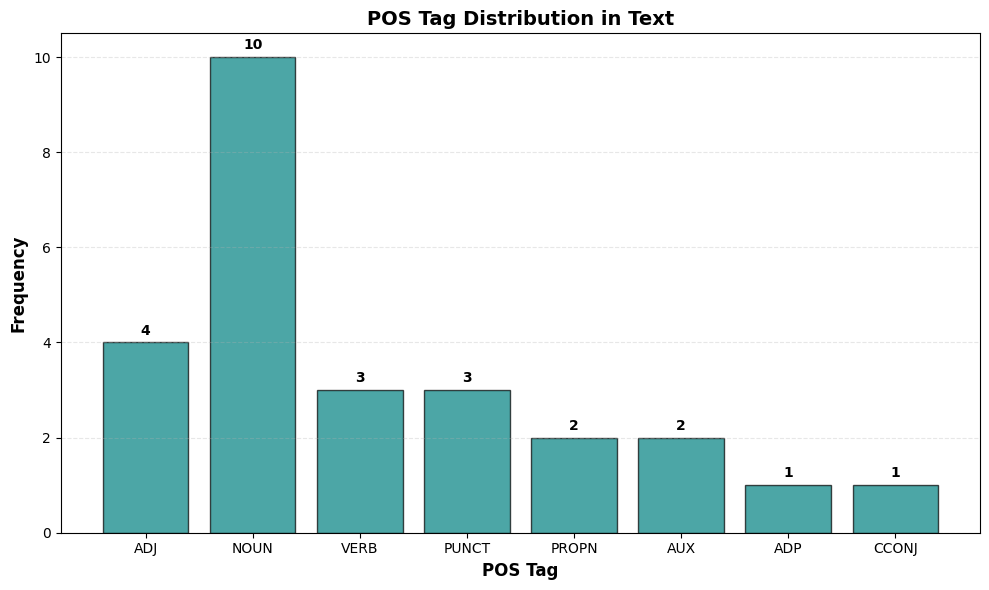

In [14]:
# Visualize POS tag frequency with a bar chart
import matplotlib.pyplot as plt

# Extract POS tags and their counts
pos_tags = list(pos_counts.keys())
frequencies = list(pos_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pos_tags, frequencies, color="teal", edgecolor="black", alpha=0.7)
plt.xlabel("POS Tag", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.title("POS Tag Distribution in Text", fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, (tag, freq) in enumerate(zip(pos_tags, frequencies)):
    plt.text(i, freq + 0.1, str(freq), ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

In [9]:
from spacy import displacy

In [ ]:
options = {"distance": 100, "compact": "True", "color": "yellow", "bg": "teal"}
displacy.render(doc4, style="dep", jupyter=True, options=options)

In [6]:
# Example 5: Extract noun phrases (noun + adjectives)
text5 = (
    "The quick brown fox jumps over the lazy dog. A fast red car raced down the street."
)
doc5 = nlp(text5)

print("\nExample 5: Extract Noun Phrases")
print("=" * 50)

# Find noun chunks (noun phrases automatically detected by spaCy)
for chunk in doc5.noun_chunks:
    print(f"Noun phrase: {chunk.text:<30} Root: {chunk.root.text} ({chunk.root.pos_})")


Example 5: Extract Noun Phrases
Noun phrase: The quick brown fox            Root: fox (NOUN)
Noun phrase: the lazy dog                   Root: dog (NOUN)
Noun phrase: A fast red car                 Root: car (NOUN)
Noun phrase: the street                     Root: street (NOUN)
